In [4]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE

In [5]:
def matrix_maker(y):
    matrix = np.zeros((len(y_input)//4,4))
    
    for i in range(matrix.shape[0]):
        for j in range(4):
            matrix[i,j]= y_input[4*i+j]
    return matrix


def array_maker(M):
    array = np.zeros(len(y_input))
    
    for i in range(matrix.shape[0]):
        for j in range(4):
            array[4*i+j] = M[i,j]
    return array

In [6]:
y_input = np.arange(24)
matrix = matrix_maker(y_input)

array = array_maker(matrix)

In [7]:
print(y_input)
print(matrix)
print(array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. 18. 19.]
 [20. 21. 22. 23.]]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]


In [5]:
dm2 = 2              #p has the parameters that are specific to the problem
th = .5*np.arcsin(.8)
E = 1

p = np.zeros(3)

p[-1] = dm2
p[-2] = th
p[-3] = E


print(p)

[1.         0.46364761 2.        ]


In [6]:
x0 = 0                  #initial time 
y0 = np.zeros(4)
y0[:] = [1, 0, 0, 1]       # initial condition, 100% prob initially ve
dx0 = 0.01/.8
N_step = 100               #number of runge kutta steps 
dN = 1
x_final = 10            #final time 
    

In [7]:
def f(x, y, p):         #this is in the derivitives file 
    derivatives = np.zeros(4)
    derivatives[0] = 0
    derivatives[1] = p[-1]/(2*p[-3])*(np.cos(2*p[-2])*y[2])
    derivatives[2] = p[-1]/(2*p[-3])*((-np.cos(2*p[-2])*y[1]) - (np.sin(2*p[-2])*y[3]))
    derivatives[3] = p[-1]/(2*p[-3])*(np.sin(2*p[-2])*y[2])
                                           
    return derivatives


x0 = 0
y0 = np.zeros(4)
y0[:] = [1, 0, 0, 1]
f(x0, y0, p)

array([ 0. ,  0. , -0.8,  0. ])

In [8]:
x, y, dx, end = ODE.ODEOneRun(x0, y0, dx0, p, N_step, dN, x_final)         # the ODE.ODE thing accesses the derivatives file and uses the function in there

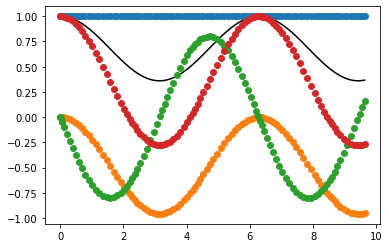

In [9]:
x_check = np.linspace(0,10,1000)
y_check = .5*y[:,0]*(1+y[:,3])


plt.figure()
plt.plot(x, y_check, color= 'black')
plt.plot(x, y, 'o')
plt.show()

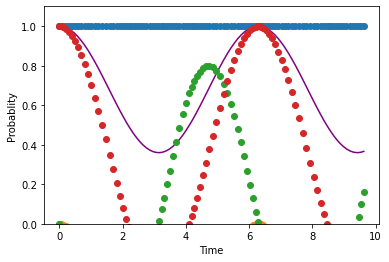

In [10]:
y_check2 = 1 - (np.sin(2*p[-2]))**2*(np.sin(p[-1]*x/(4*p[-3])))**2

plt.figure()

plt.plot(x, y_check2, color="purple")
plt.ylim(0,1.1)
plt.xlabel("Time")
plt.ylabel("Probablity")
plt.plot(x, y, 'o')
plt.show()